## Imports

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

## Variables

In [47]:
airport_codes = {
    "PHILADELPHIA INTERNATIONAL AIRPORT, PA US": "PHL",
    "SEATTLE TACOMA AIRPORT, WA US": "SEA",
    "JFK INTERNATIONAL AIRPORT, NY US": "JFK",
    "DENVER INTERNATIONAL AIRPORT, CO US": "DEN",
    "NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US": "EWR",
    "MCCARRAN INTERNATIONAL AIRPORT, NV US": "LAS",
    "ORLANDO INTERNATIONAL AIRPORT, FL US": "MCO",
    "ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPORT, GA US": "ATL",
    "FORT LAUDERDALE INTERNATIONAL AIRPORT, FL US": "FLL",
    "DETROIT METRO AIRPORT, MI US": "DTW",
    "WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US": "IAD",
    "CHICAGO OHARE INTERNATIONAL AIRPORT, IL US": "ORD",
    "LOS ANGELES INTERNATIONAL AIRPORT, CA US": "LAX",
    "CHARLOTTE DOUGLAS AIRPORT, NC US": "CLT",
    # "BOSTON LOGAN INTERNATIONAL AIRPORT, MA US": "BOS",
    "MIAMI INTERNATIONAL AIRPORT, FL US": "MIA",
    "HOUSTON INTERCONTINENTAL AIRPORT, TX US": "IAH",
    "SAN FRANCISCO INTERNATIONAL AIRPORT, CA US": "SFO",
}

## Load data

In [48]:
dallas_fort_worth = 72259303985 # Dallas 
boston_logan = 72509014739 # Boston

In [49]:
data = pd.read_csv('../data/raw/us_airport_weather_2021_2022.csv', low_memory=False)
# msno.matrix(data)

## Feature selection

In [50]:
# print the name of the columns in a beautiful way
for i in data.columns:
    print(i)

STATION
NAME
LATITUDE
LONGITUDE
ELEVATION
DATE
REPORT_TYPE
SOURCE
AWND
BackupDirection
BackupDistance
BackupDistanceUnit
BackupElements
BackupElevation
BackupEquipment
BackupLatitude
BackupLongitude
BackupName
CDSD
CLDD
DSNW
DYHF
DYTS
DailyAverageDewPointTemperature
DailyAverageDryBulbTemperature
DailyAverageRelativeHumidity
DailyAverageSeaLevelPressure
DailyAverageStationPressure
DailyAverageWetBulbTemperature
DailyAverageWindSpeed
DailyCoolingDegreeDays
DailyDepartureFromNormalAverageTemperature
DailyHeatingDegreeDays
DailyMaximumDryBulbTemperature
DailyMinimumDryBulbTemperature
DailyPeakWindDirection
DailyPeakWindSpeed
DailyPrecipitation
DailySnowDepth
DailySnowfall
DailySustainedWindDirection
DailySustainedWindSpeed
DailyWeather
HDSD
HTDD
HourlyAltimeterSetting
HourlyDewPointTemperature
HourlyDryBulbTemperature
HourlyPrecipitation
HourlyPresentWeatherType
HourlyPressureChange
HourlyPressureTendency
HourlyRelativeHumidity
HourlySeaLevelPressure
HourlySkyConditions
HourlyStationPress

<Axes: >

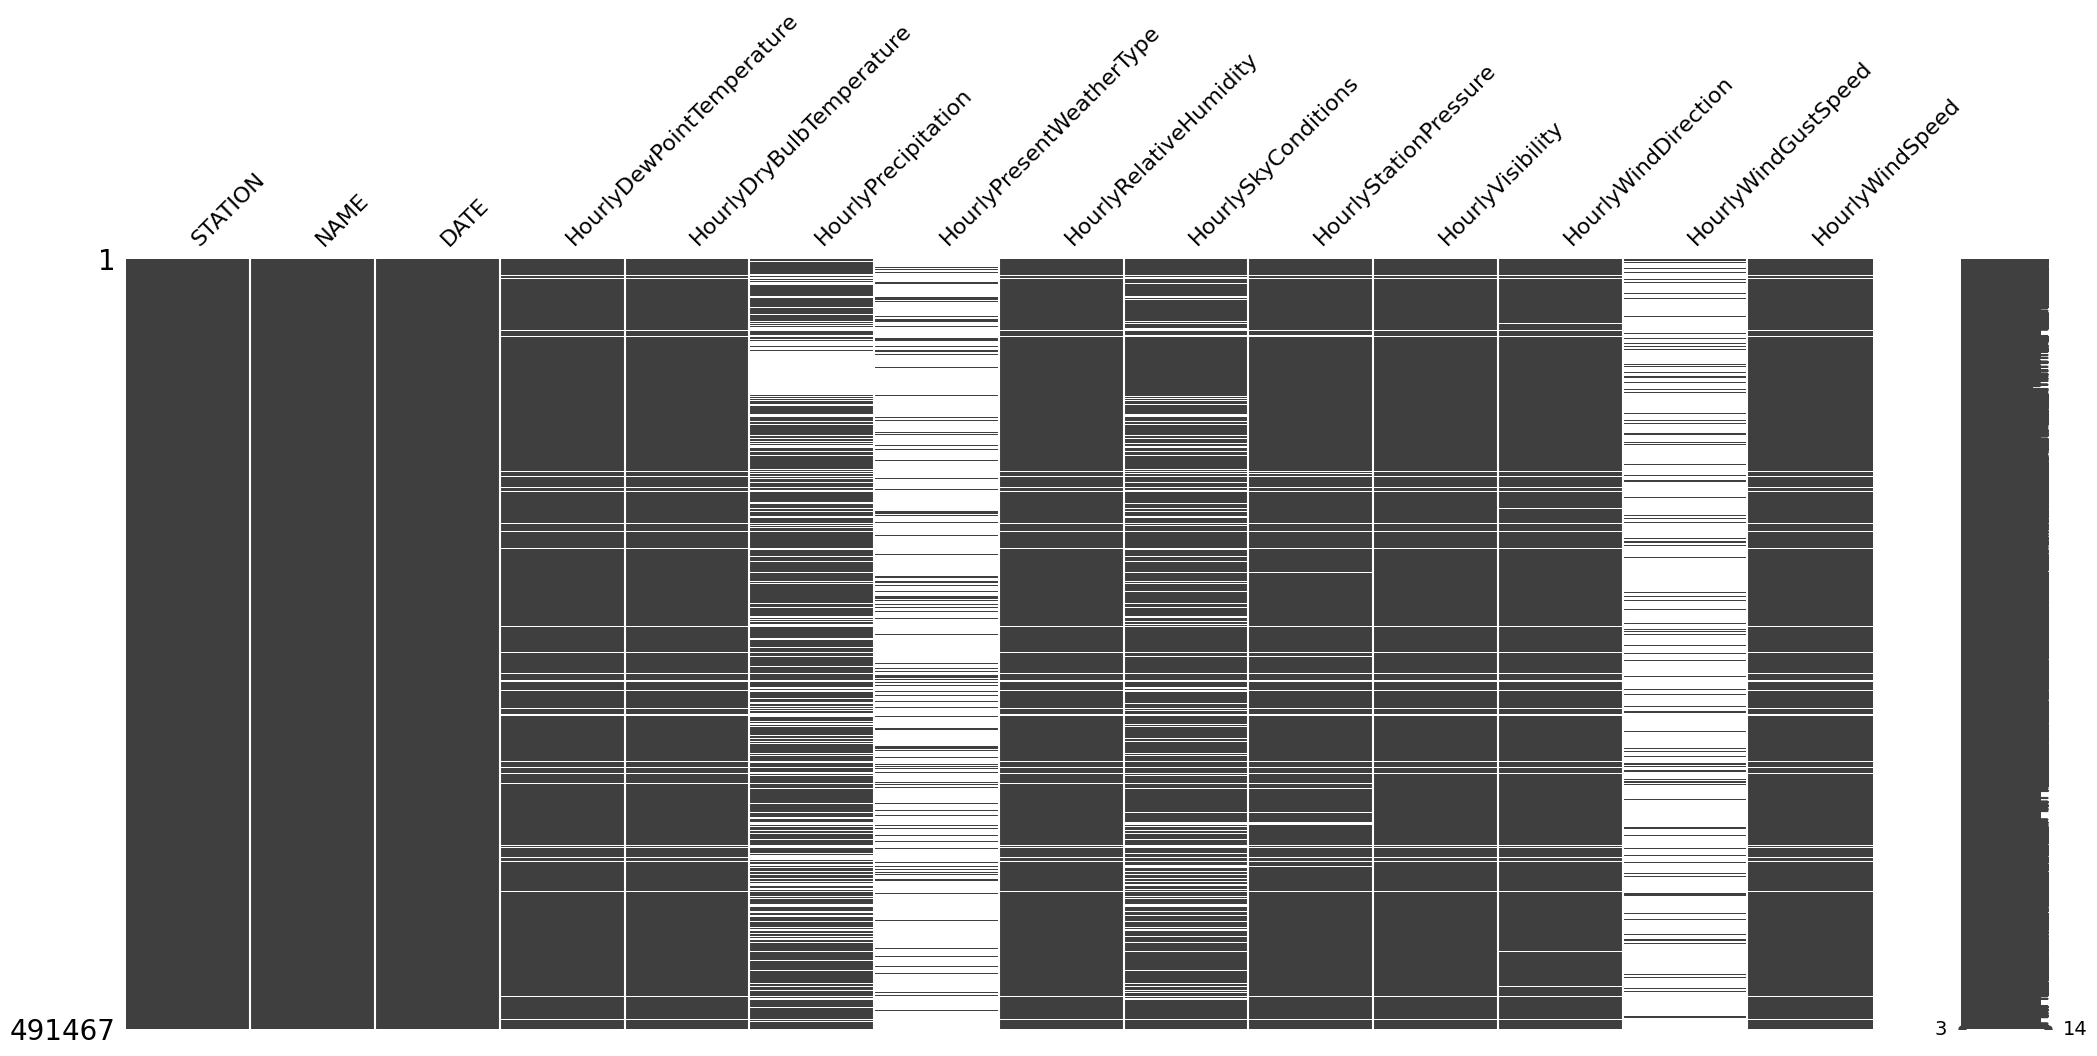

In [51]:
column_used = [
    "STATION",
    "NAME",
    "DATE",
    # "HourlyAltimeterSetting",
    "HourlyDewPointTemperature",
    "HourlyDryBulbTemperature",
    "HourlyPrecipitation",
    "HourlyPresentWeatherType",
    # "HourlyPressureChange",
    # "HourlyPressureTendency",
    "HourlyRelativeHumidity",
    # "HourlySeaLevelPressure",
    "HourlySkyConditions",
    "HourlyStationPressure",
    "HourlyVisibility",
    # "HourlyWetBulbTemperature",
    "HourlyWindDirection",
    "HourlyWindGustSpeed",
    "HourlyWindSpeed",
]

data_selected = data[column_used]
msno.matrix(data_selected)

In [52]:
# print the number of missing values for each column
for i in data_selected.columns:
    print(i, ": ",data_selected[i].isnull().sum())

STATION :  0
NAME :  0
DATE :  0
HourlyDewPointTemperature :  16329
HourlyDryBulbTemperature :  16255
HourlyPrecipitation :  157518
HourlyPresentWeatherType :  418183
HourlyRelativeHumidity :  16337
HourlySkyConditions :  88549
HourlyStationPressure :  22119
HourlyVisibility :  16184
HourlyWindDirection :  18491
HourlyWindGustSpeed :  434962
HourlyWindSpeed :  16535


## Fill/remove rows with missing values

<Axes: >

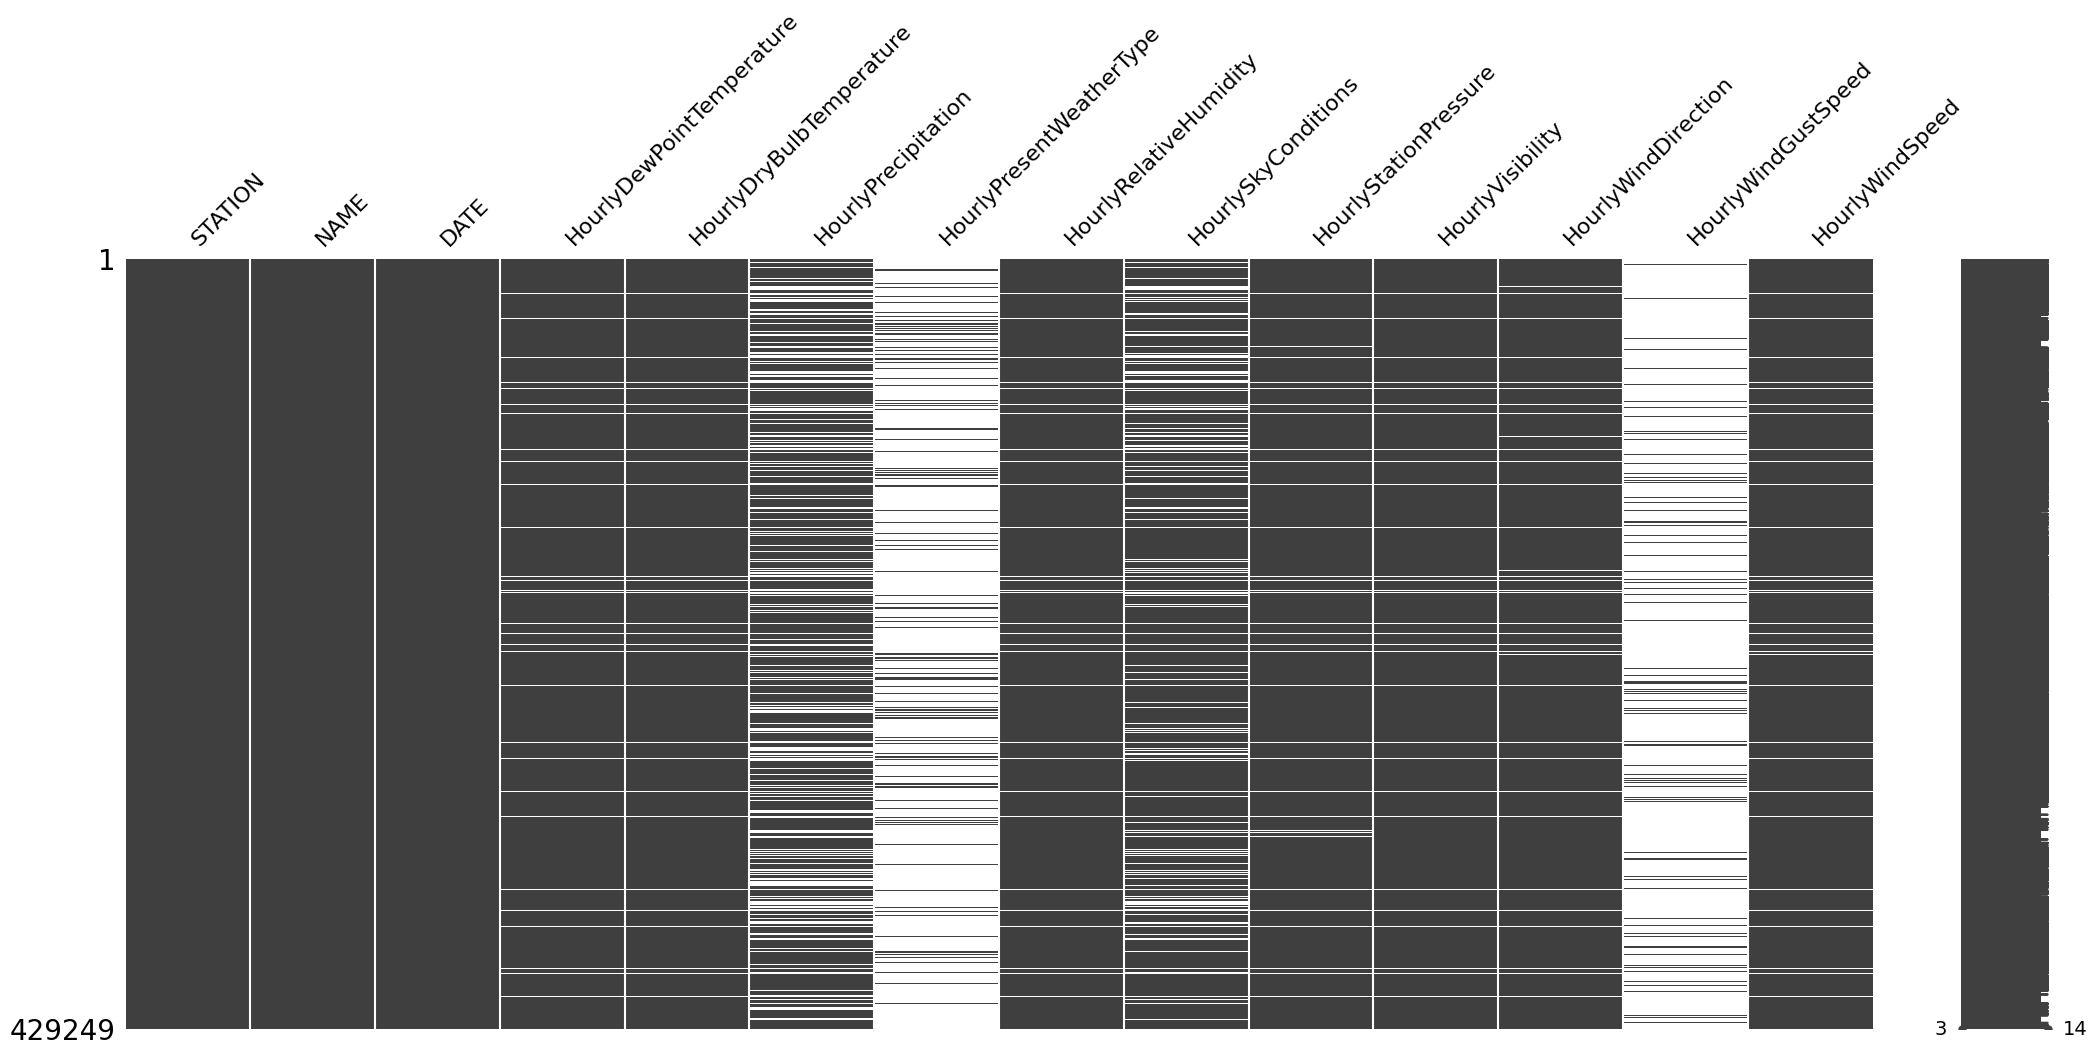

In [53]:
# remove the rows from station 72259303985 which seems to be missing percipitation data
data_selected = data_selected[data_selected["STATION"] != dallas_fort_worth]
data_selected = data_selected[data_selected["STATION"] != boston_logan]
msno.matrix(data_selected)

<Axes: >

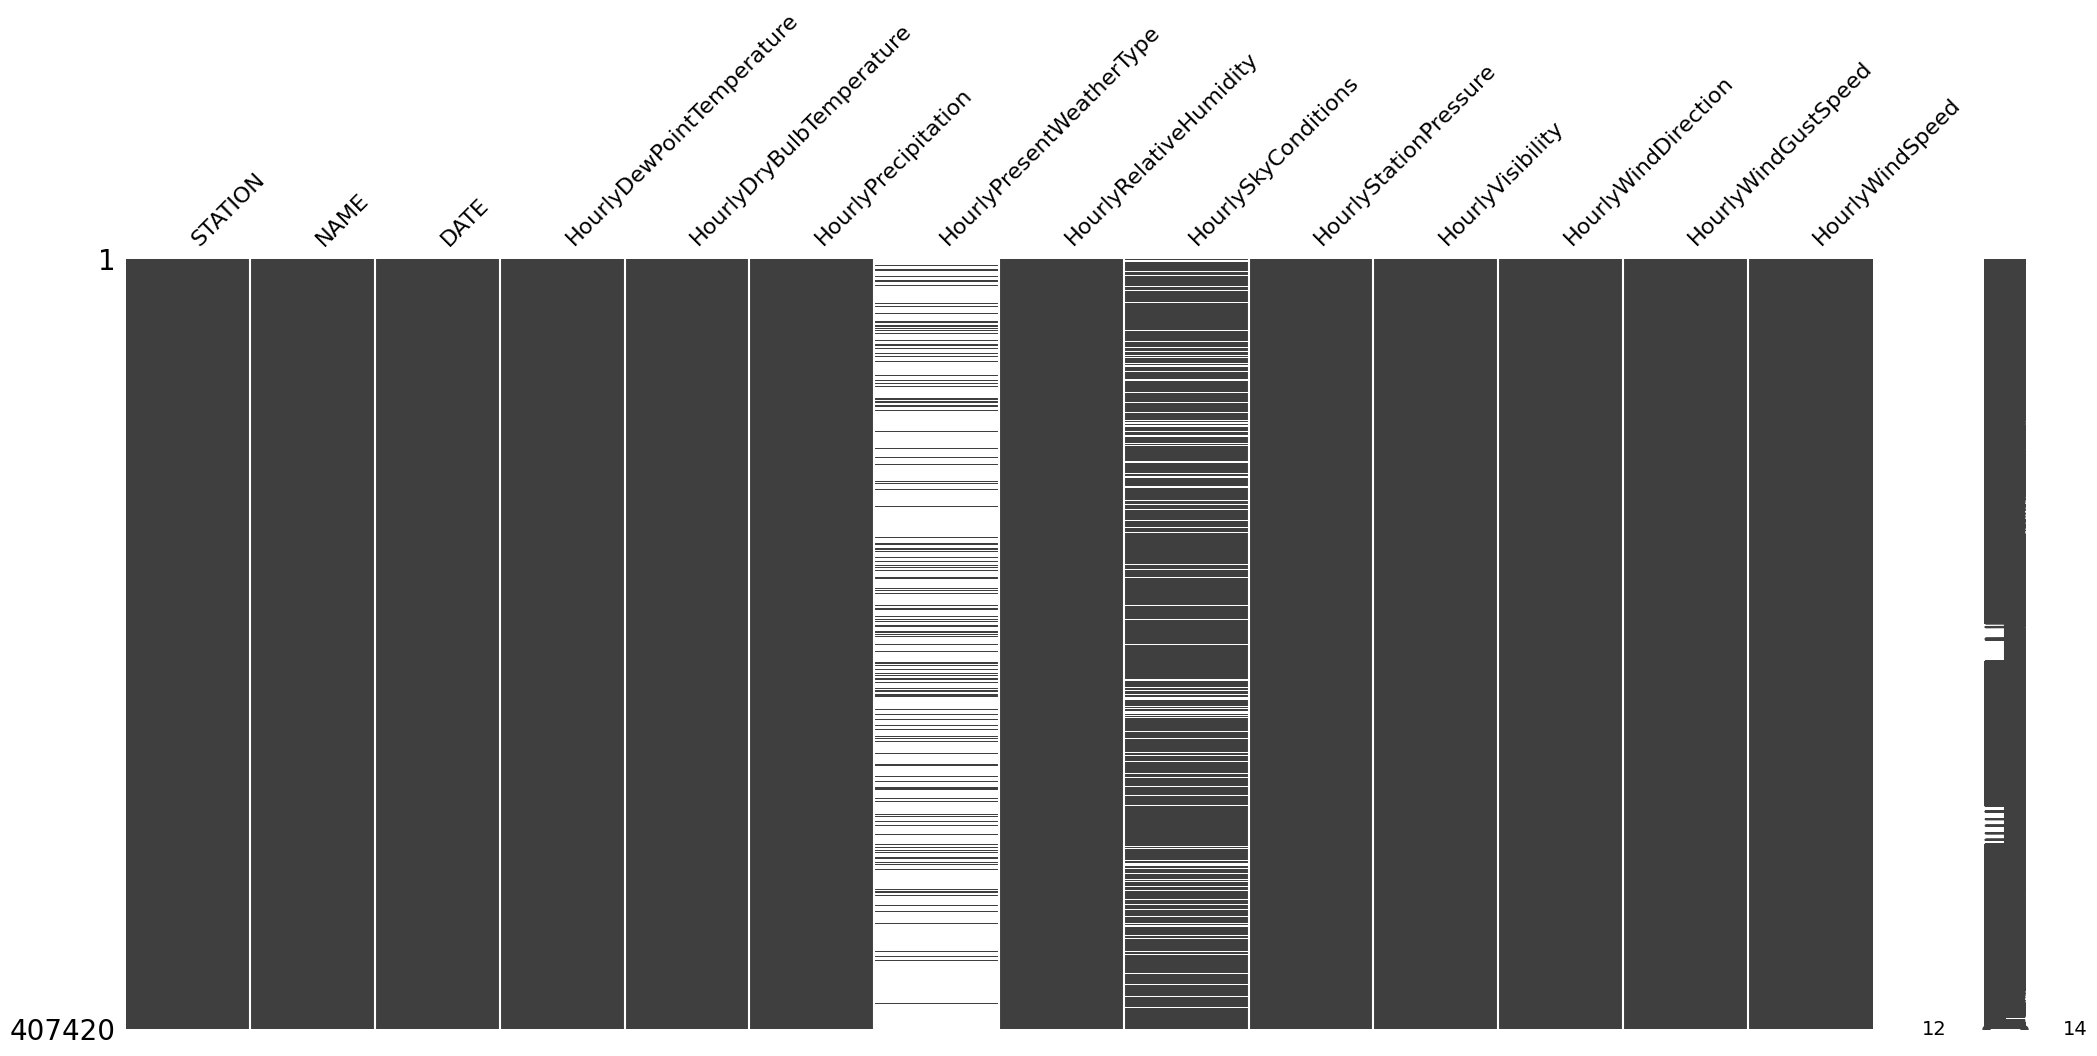

In [54]:
# Fill "HourlyWindGustSpeed" is missing with 0. This is because the missing values are when there is no gust.
data_selected["HourlyWindGustSpeed"] = data_selected["HourlyWindGustSpeed"].fillna(0.0)

# Fill "Hourlyprecipitation" with 0. This is because the missing values are when there is no precipitation.
data_selected["HourlyPrecipitation"] = data_selected["HourlyPrecipitation"].fillna(0.0)

# Remove the rows with missing values in the columns "HourlyDewPointTemperature", "HourlyDryBulbTemperature", 
# "HourlyRelativeHumidity", "HourlyStationPressure", "HourlyVisibility", "HourlyWindDirection", "HourlyWindSpeed"
data_selected = data_selected.dropna( subset=["HourlyDewPointTemperature", "HourlyDryBulbTemperature",
                                                "HourlyRelativeHumidity", "HourlyStationPressure",
                                                "HourlyVisibility", "HourlyWindDirection", "HourlyWindSpeed"])

msno.matrix(data_selected)

## Transfromations

In [55]:
# Drop the station column
data_selected = data_selected.drop(columns=["STATION"])

In [56]:
# Print the type of each column
for i in data_selected.columns:
    print(i, ": ", data_selected[i].dtype)

NAME :  object
DATE :  object
HourlyDewPointTemperature :  float64
HourlyDryBulbTemperature :  float64
HourlyPrecipitation :  object
HourlyPresentWeatherType :  object
HourlyRelativeHumidity :  float64
HourlySkyConditions :  object
HourlyStationPressure :  float64
HourlyVisibility :  object
HourlyWindDirection :  object
HourlyWindGustSpeed :  object
HourlyWindSpeed :  float64


In [57]:
# Unique values for each column
for i in data_selected.columns:
    print(i, ": ",data_selected[i].unique())

NAME :  ['PHILADELPHIA INTERNATIONAL AIRPORT, PA US'
 'SEATTLE TACOMA AIRPORT, WA US' 'JFK INTERNATIONAL AIRPORT, NY US'
 'DENVER INTERNATIONAL AIRPORT, CO US'
 'NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US'
 'MCCARRAN INTERNATIONAL AIRPORT, NV US'
 'ORLANDO INTERNATIONAL AIRPORT, FL US'
 'ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPORT, GA US'
 'FORT LAUDERDALE INTERNATIONAL AIRPORT, FL US'
 'DETROIT METRO AIRPORT, MI US'
 'WASHINGTON DULLES INTERNATIONAL AIRPORT, VA US'
 'CHICAGO OHARE INTERNATIONAL AIRPORT, IL US'
 'LOS ANGELES INTERNATIONAL AIRPORT, CA US'
 'CHARLOTTE DOUGLAS AIRPORT, NC US' 'MIAMI INTERNATIONAL AIRPORT, FL US'
 'HOUSTON INTERCONTINENTAL AIRPORT, TX US'
 'SAN FRANCISCO INTERNATIONAL AIRPORT, CA US']
DATE :  ['2021-01-01T00:54:00' '2021-01-01T01:00:00' '2021-01-01T01:54:00' ...
 '2022-12-31T15:17:00' '2022-12-31T16:01:00' '2022-12-31T16:37:00']
HourlyDewPointTemperature :  [ -5.   -5.6  -6.1  -4.4  -3.9  -3.3  -2.8  -0.6   0.    0.6   1.1   1.7
   2.2   2.8   3.3   

### Values

In [58]:
# Transform T (trace) to 0.0
data_selected["HourlyPrecipitation"] = data_selected["HourlyPrecipitation"].replace("T", 0.0)

# Transform airport name to airport code and change the name of the column to "AIRPORT"
data_selected["NAME"] = data_selected["NAME"].replace(airport_codes)
data_selected = data_selected.rename(columns={"NAME": "AIRPORT"})

# Replace X.XV in where X.X... is a float "HourlyVisibility" with X.X
data_selected["HourlyVisibility"] = data_selected['HourlyVisibility'].str.replace(r'V', '', regex=True)

# Change the row where the column "HourlyPrecipitation" is '0.040.03' to 0.035
data_selected["HourlyPrecipitation"] = data_selected["HourlyPrecipitation"].replace("0.040.03", 0.035)

# Drop the rows where the column "HourlyWindDirection" is 'VRB'
data_selected = data_selected[data_selected["HourlyWindDirection"] != 'VRB']


### Columns

In [59]:
# Transform the column "AIRPORT" to category
data_selected["AIRPORT"] = data_selected["AIRPORT"].astype('category')

# Transform the column "DATE" to datetime
data_selected["DATE"] = pd.to_datetime(data_selected["DATE"])

# Transform the column "HourlyPrecipitation", "HourlyVisibility", "HourlyWindGustSpeed" to float
data_selected["HourlyPrecipitation"] = data_selected["HourlyPrecipitation"].astype(float)
data_selected["HourlyVisibility"] = data_selected["HourlyVisibility"].astype(float)
data_selected["HourlyWindGustSpeed"] = data_selected["HourlyWindGustSpeed"].astype(float)

# Transform the column "HourlyWindDirection" to int
data_selected["HourlyWindDirection"] = data_selected["HourlyWindDirection"].astype(int)

In [60]:
# Print the type of each column after the transformation
for i in data_selected.columns:
    print(i, ": ", data_selected[i].dtype)

AIRPORT :  category
DATE :  datetime64[ns]
HourlyDewPointTemperature :  float64
HourlyDryBulbTemperature :  float64
HourlyPrecipitation :  float64
HourlyPresentWeatherType :  object
HourlyRelativeHumidity :  float64
HourlySkyConditions :  object
HourlyStationPressure :  float64
HourlyVisibility :  float64
HourlyWindDirection :  int64
HourlyWindGustSpeed :  float64
HourlyWindSpeed :  float64


In [61]:
# Unique values for each column after the transformation
for i in data_selected.columns:
    print(i, ": ",data_selected[i].unique())

AIRPORT :  ['PHL', 'SEA', 'JFK', 'DEN', 'EWR', ..., 'LAX', 'CLT', 'MIA', 'IAH', 'SFO']
Length: 17
Categories (17, object): ['ATL', 'CLT', 'DEN', 'DTW', ..., 'ORD', 'PHL', 'SEA', 'SFO']
DATE :  <DatetimeArray>
['2021-01-01 00:54:00', '2021-01-01 01:00:00', '2021-01-01 01:54:00',
 '2021-01-01 02:54:00', '2021-01-01 03:54:00', '2021-01-01 04:54:00',
 '2021-01-01 05:54:00', '2021-01-01 06:54:00', '2021-01-01 07:00:00',
 '2021-01-01 07:54:00',
 ...
 '2022-12-30 22:08:00', '2022-12-31 01:15:00', '2022-12-31 02:37:00',
 '2022-12-31 05:04:00', '2022-12-31 05:47:00', '2022-12-31 07:18:00',
 '2022-12-31 14:03:00', '2022-12-31 15:17:00', '2022-12-31 16:01:00',
 '2022-12-31 16:37:00']
Length: 147829, dtype: datetime64[ns]
HourlyDewPointTemperature :  [ -5.   -5.6  -6.1  -4.4  -3.9  -3.3  -2.8  -0.6   0.    0.6   1.1   1.7
   2.2   2.8   3.3   3.9   4.4   5.   -1.1  -1.7  -2.2  -6.7  -7.8  -9.4
 -10.6 -11.1 -10.  -11.7 -12.8  -8.9  -8.3  -7.2   5.6   6.1   6.7   7.2
   7.8   8.3 -12.2 -14.4 -15.6 -

## Fix date columns

In [62]:
data_selected_datefix = data_selected.copy()
print("Total number of dates before removing: ", len(data_selected_datefix))

# Sample the first row of each hour
data_selected_datefix.set_index(["AIRPORT", "DATE"], inplace=True)
data_selected_datefix.sort_index(inplace=True)
data_selected_datefix = data_selected_datefix.groupby([pd.Grouper(level='AIRPORT'), pd.Grouper(level='DATE', freq='H')], observed=False).first()
data_selected_datefix.reset_index(inplace=True)

print("----------------------------------------")
for hours in range(0,24):
    print("Total number of dates with hours == ", hours, ": ", len(data_selected_datefix[ data_selected_datefix["DATE"].dt.hour == hours ]))

print("----------------------------------------")
# distribution of the number of dates per airport
for i in airport_codes.values():
    print("Total number of dates for airport ", i, ": ", len(data_selected_datefix[ data_selected_datefix["AIRPORT"] == i ]))

print("----------------------------------------")
print("Total number of dates after removing duplicates: ", len(data_selected_datefix))

# data_selected = data_selected[data_selected["DATE"].dt.minute.isin([51, 52, 53, 54, 56])]
# print("Total number of rows of data selected: ", len(data_selected))



Total number of dates before removing:  395164


----------------------------------------
Total number of dates with hours ==  0 :  12410
Total number of dates with hours ==  1 :  12410
Total number of dates with hours ==  2 :  12410
Total number of dates with hours ==  3 :  12410
Total number of dates with hours ==  4 :  12410
Total number of dates with hours ==  5 :  12410
Total number of dates with hours ==  6 :  12410
Total number of dates with hours ==  7 :  12410
Total number of dates with hours ==  8 :  12410
Total number of dates with hours ==  9 :  12410
Total number of dates with hours ==  10 :  12410
Total number of dates with hours ==  11 :  12410
Total number of dates with hours ==  12 :  12410
Total number of dates with hours ==  13 :  12410
Total number of dates with hours ==  14 :  12410
Total number of dates with hours ==  15 :  12410
Total number of dates with hours ==  16 :  12410
Total number of dates with hours ==  17 :  12410
Total number of dates with hours ==  18 :  12410
Total number of dates with hours ==  1

In [63]:
data_selected.describe()

,DATE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
count,395164,395164.000000,395164.000000,395164.000000,395164.000000,395164.000000,395164.000000,395164.000000,395164.000000,395164.000000
mean,2021-12-30 06:43:21.801023744,9.005329,16.125181,0.146082,67.454755,991.383884,14.543804,173.944329,1.345224,3.874310
min,2021-01-01 00:00:00,-32.800000,-30.000000,0.000000,2.000000,808.330000,0.000000,0.000000,0.000000,0.000000
25%,2021-07-01 11:53:45,1.100000,9.400000,0.000000,53.000000,989.840000,16.000000,80.000000,0.000000,2.000000
50%,2021-12-30 10:53:00,10.600000,17.200000,0.000000,72.000000,1006.100000,16.090000,180.000000,0.000000,4.000000
75%,2022-06-28 07:53:00,18.300000,23.900000,0.000000,85.000000,1015.240000,16.090000,270.000000,0.000000,5.000000
max,2022-12-31 23:56:00,28.300000,46.700000,91.950000,100.000000,1040.640000,19.310000,360.000000,38.000000,23.000000
std,NaN,10.658121,10.052307,1.215616,21.604141,45.402736,3.721785,110.640853,3.884418,2.528426


In [64]:
data_selected_datefix.describe()

,DATE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
count,297840,288377.000000,288377.000000,288377.000000,288377.000000,288377.000000,288377.000000,288377.000000,288377.000000,288377.000000
mean,2021-12-31 23:30:00,8.836717,16.596240,0.041727,64.961509,992.283744,15.106249,174.840944,1.173616,3.808019
min,2021-01-01 00:00:00,-32.200000,-30.000000,0.000000,2.000000,808.330000,0.000000,0.000000,0.000000,0.000000
25%,2021-07-02 11:45:00,1.100000,10.000000,0.000000,51.000000,990.520000,16.000000,80.000000,0.000000,2.000000
50%,2021-12-31 23:30:00,10.600000,17.800000,0.000000,69.000000,1006.770000,16.090000,190.000000,0.000000,4.000000
75%,2022-07-02 11:15:00,17.800000,24.400000,0.000000,82.000000,1015.240000,16.090000,270.000000,0.000000,5.000000
max,2022-12-31 23:00:00,28.300000,46.700000,45.970000,100.000000,1040.640000,19.310000,360.000000,33.000000,23.000000
std,NaN,10.686701,9.945928,0.431512,21.554238,44.402294,2.923799,110.753933,3.612635,2.496505


## Save data

In [65]:
# Save the data to a csv file
data_selected_datefix.to_csv("../data/processed/us_airport_weather_2021_2022_date_fixed.csv", index=False)